In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
# plots images with labels within jupyter notebook
# source: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [4]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [5]:
chosen_image = random.choice(os.listdir('data/cats-and-dogs/train/dog'))

In [6]:
image_path = 'data/cats-and-dogs/train/dog/' + chosen_image

In [7]:
assert os.path.isfile(image_path)

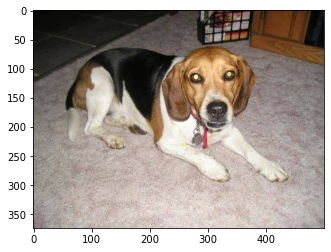

In [8]:
# Obtain image
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [9]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [10]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

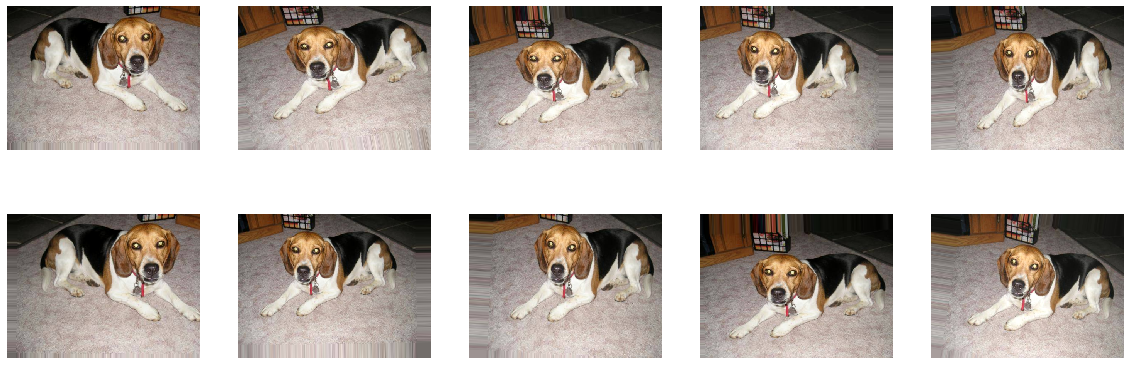

In [11]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)